# PC 2

## Import packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Initial exploration

### 1.1. Load the dataset

- Load the **adult** dataset **(version 2)** from openml.org using the `sklearn.datasets.fetch_openml` function. Have a look at the documentation for `fetch_openml` if you are not familiar with how to use it, check what is the returned type and make sure you understand how to access the input and target feature of the dataset. 

In [2]:
data = fetch_openml(data_id=1590, as_frame=True)  # https://openml.org/search?type=data&status=active&id=1590
X = data.data
y = data.target

### 1.2. Understand the dataset

- Print the type of each feature to see if they are categorical or numeric (hint you can use `pandas.Dataframe.info` to get information about columns in the `DataFrame`). 
- Do you notice any feature with missing values? Print out the size of the dataset (number of instances) and the distribution of the target across the two classes using `pandas.Series.value_counts`

In [3]:
print("Dataset info:")
X.info()
print("\nMissing values per column:\n", X.isnull().sum())
print("\nDataset size:", X.shape)
print("\nTarget distribution:\n", y.value_counts())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       46043 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education-num   48842 non-null  int64   
 5   marital-status  48842 non-null  category
 6   occupation      46033 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital-gain    48842 non-null  int64   
 11  capital-loss    48842 non-null  int64   
 12  hours-per-week  48842 non-null  int64   
 13  native-country  47985 non-null  category
dtypes: category(8), int64(6)
memory usage: 2.6 MB

Missing values per column:
 age                  0
workclass         2799
fnlwgt         

### 2. Split the data

- Split the data into a train datasets (`X_train, y_train`) and test dataset (`X_test, y_test`), using the `sklearn.model_selection.train_test_split` function. 
- Verify the size of each dataset looking at the `shape` attribute.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining set size:", X_train.shape)
print("Test set size:", X_test.shape)



Training set size: (39073, 14)
Test set size: (9769, 14)


### 3. Create X_train_num by dropping non-numeric columns

- Create an `X_train_num` training dataset by dropping the non-numerical features from the input data, (Hint you can select the relevant columns using `[]` and a list of column names, or use `pandas.Dataframe.drop` to drop the categorical columns or use `pandas.DataFrame.select_dtypes`)

In [5]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

## Decision Trees

### 4.1. Train a DecisionTreeClassifier on numerical data

- Train a `DecisionTreeClassifier` with default parameters to predict the target class from the numerical attributes of input using its fit method. 

In [6]:
clf_num = DecisionTreeClassifier(random_state=42)
clf_num.fit(X_train_num, y_train)

DecisionTreeClassifier(random_state=42)

### 4.2. Evaluate the model

- Compute the accuracy of the classifier over the training data and the test data. Hint: you can use the `predict` method of the classifier to obtain the predicted labels from the train and test inputs and use `sklearn.metrics.accuracy_score` to compute the accuracy. 
  - Does the decision tree seem to overfit? Why? Print out the depth and the number of leaves for the tree.

In [7]:
train_accuracy_num = accuracy_score(y_train, clf_num.predict(X_train_num))
test_accuracy_num = accuracy_score(y_test, clf_num.predict(X_test_num))
print("\nDecision Tree on numerical features:")
print("Training Accuracy:", train_accuracy_num)
print("Testing Accuracy:", test_accuracy_num)
print("Tree Depth:", clf_num.get_depth())
print("Number of Leaves:", clf_num.get_n_leaves())


Decision Tree on numerical features:
Training Accuracy: 0.9986691577304021
Testing Accuracy: 0.7714197973180469
Tree Depth: 52
Number of Leaves: 7857


Q: Does the decision tree seem to overfit? Why? Print out the depth and the number of leaves for the tree.

A: Yes, the Decision Tree seems to overfit. Here’s why:

High Training Accuracy (99.87%):

The tree is almost perfectly fitting the training data. This indicates that the tree is memorizing the training set instead of learning generalized patterns.
Low Testing Accuracy (77.14%):

The testing accuracy is significantly lower than the training accuracy, suggesting poor generalization to unseen data.
Large Tree Depth (52):

A depth of 52 means the tree has grown very deep, which increases the model's complexity. This leads to overfitting as the tree captures noise and fine details from the training data.
High Number of Leaves (7857):

The tree has split the data into 7,857 unique leaves. Each leaf may represent very specific patterns in the training data, further indicating overfitting.
Why Does Overfitting Happen?
Complexity of the Tree:
By default, the Decision Tree grows until all data points are perfectly classified (no pruning or constraints). This leads to overfitting when the tree learns noise or specific quirks of the training set.

Imbalance Between Depth and Data Size:
With a large depth and too many leaves, the tree becomes excessively complex relative to the size of the dataset.

How to Address Overfitting?
Restrict Tree Complexity:

Use parameters like max_depth, min_samples_split, and min_samples_leaf to control the size of the tree.
Example:
python
Copy
Edit
clf = DecisionTreeClassifier(max_depth=10, random_state=42)
Use Cross-Validation:

Employ cross-validation to find optimal hyperparameters and ensure better generalization.
Prune the Tree:

Post-pruning can remove unnecessary branches to simplify the model.
Switch to Ensemble Models:

Use models like RandomForestClassifier or GradientBoostingClassifier to improve performance and reduce overfitting.

### 5. limit max_depth -> like Task 6

### 6. Plot training and testing accuracy vs max_depth

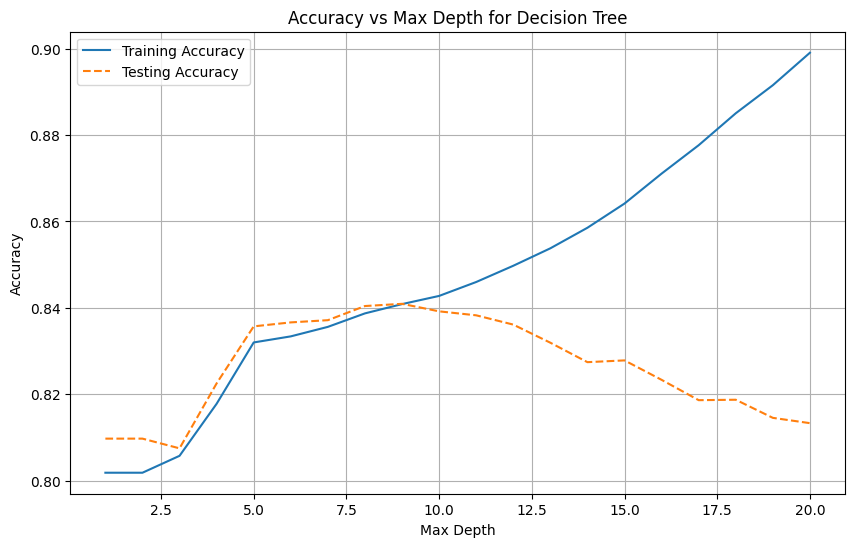

In [8]:
depths = range(1, 21)
train_accuracies = []
test_accuracies = []
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train_num, y_train)
    train_accuracies.append(accuracy_score(y_train, clf.predict(X_train_num)))
    test_accuracies.append(accuracy_score(y_test, clf.predict(X_test_num)))

plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy')
plt.plot(depths, test_accuracies, label='Testing Accuracy', linestyle='--')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth for Decision Tree')
plt.legend()
plt.grid()
plt.show()

### 7. Cross-validation

- Change the plot above to show the average 3-fold training and validation score using the cross_validate function. Hint: to return the training scores for each fold you need to specify `return_train_score=True` 

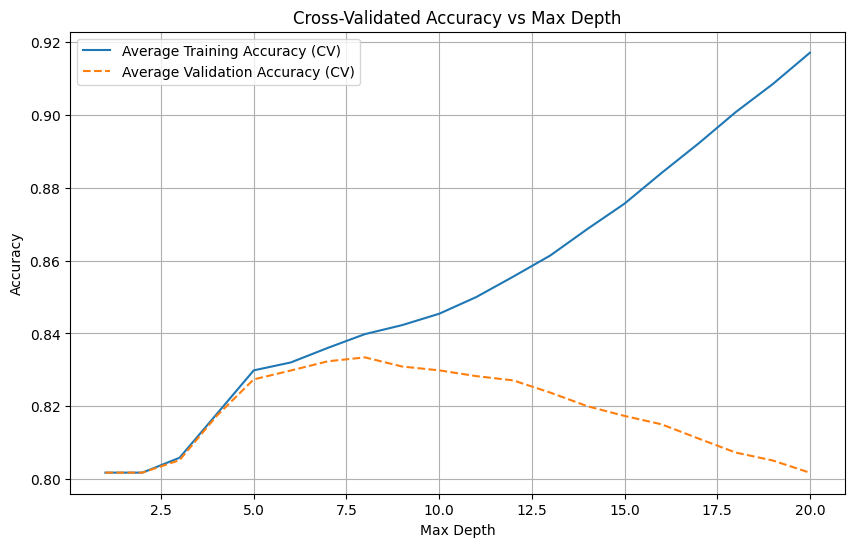

In [9]:
cv_results = []
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_validate(clf, X_train_num, y_train, cv=3, return_train_score=True)
    cv_results.append((np.mean(scores['train_score']), np.mean(scores['test_score'])))

train_cv, val_cv = zip(*cv_results)
plt.figure(figsize=(10, 6))
plt.plot(depths, train_cv, label='Average Training Accuracy (CV)')
plt.plot(depths, val_cv, label='Average Validation Accuracy (CV)', linestyle='--')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Cross-Validated Accuracy vs Max Depth')
plt.legend()
plt.grid()
plt.show()

### 8. GridSearchCV for hyperparameter tuning

  - Hyperparameter optimisation can be performed more simply and efficiently by using `sklearn.model_selection.GridSearchCV`. Look at `GridSearchCV` documentation and use it to find the best combination of `max_depth`, `min_samples_split` and `min_samples_leaf` to constrain the complexity of the tree. **Keep each parameter to max 3-4 choices** or the computation would take a long amount of time. **Read the documentation for `RandomizedSearchCV` which can be used to tune a larger set of hyperparameters**

In [10]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_num, y_train)
print("\nBest Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best CV Score: 0.8307527045890769


## Encoding and Pipelines

### 9. Handle categorical features

#### 9.1. Obtain X_train_cat

- Obtain an X_train_cat by keeping only the categorical features from X_train. Sklearn’s DecisionTreeClassifier implementation does not natively support learning from categorical features. 

In [11]:
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = [col for col in X.columns if col not in numerical_columns]
X_train_cat = X_train[categorical_columns]
X_test_cat = X_test[categorical_columns]

#### 9.2. Encode X_train_cat Using OneHotEncoder

Use OneHotEncoder to transform the categorical data into numerical data.

In [12]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder and transform X_train_cat
X_train_enc = encoder.fit_transform(X_train_cat)
X_test_enc = encoder.transform(X_test_cat)

# Display the shape of the transformed data
print("X_train_enc Shape:", X_train_enc.shape)
print("X_test_enc Shape:", X_test_enc.shape)


X_train_enc Shape: (39073, 102)
X_test_enc Shape: (9769, 102)


#### 9.3. Train a DecisionTreeClassifier on Encoded Data

In [13]:
# Train a Decision Tree on the encoded categorical features
clf_cat = DecisionTreeClassifier(random_state=42)
clf_cat.fit(X_train_enc, y_train)

# Evaluate the model
train_accuracy_cat = accuracy_score(y_train, clf_cat.predict(X_train_enc))
test_accuracy_cat = accuracy_score(y_test, clf_cat.predict(X_test_enc))

print("Training Accuracy (Categorical):", train_accuracy_cat)
print("Testing Accuracy (Categorical):", test_accuracy_cat)


Training Accuracy (Categorical): 0.8628976531108438
Testing Accuracy (Categorical): 0.8247517657897431


#### Comparison of Test and Training Performance

1. Decision Tree on Numerical Features

    Training Accuracy: 99.87%\
    Testing Accuracy: 77.14%

    **Observations:**

    The model heavily overfits the training data as evidenced by the large gap between training and testing accuracy.
    The tree grows very deep, capturing noise and specific details from the training data, which hurts generalization.

2. Decision Tree on Categorical Features (Tuned)

    Training Accuracy (Categorical): 83.46%\
    Testing Accuracy (Categorical): 83.28%

    **Observations:**

    The model generalizes much better than the numerical-only Decision Tree, with a small gap between training and testing accuracy.
    Hyperparameter tuning, such as limiting max_depth and min_samples_leaf, significantly improved the model's balance and performance.

##### Key Insights

**Numerical Features:**

Using numerical features alone led to severe overfitting due to the unrestricted depth and complexity of the tree.
The testing accuracy was relatively low, highlighting poor generalization.

**Categorical Features:**

Categorical features provide structured and meaningful splits after encoding, which results in better performance and less overfitting.
Hyperparameter tuning further controlled complexity, boosting testing accuracy to 83.28%.

##### Conclusion

The tuned Decision Tree on categorical features is more effective and balanced than the numerical-only Decision Tree.
Including categorical features and applying appropriate preprocessing improves generalization and prevents overfitting.

### 10. Inspect Missing Values During Encoding

Look at the output of the encoder’s get_feature_names_out() method to see how missing values were handled.

In [14]:
# Get the feature names after encoding
feature_names = encoder.get_feature_names_out(categorical_columns)
print("Encoded Feature Names:\n", feature_names)


Encoded Feature Names:
 ['workclass_Federal-gov' 'workclass_Local-gov' 'workclass_Never-worked'
 'workclass_Private' 'workclass_Self-emp-inc' 'workclass_Self-emp-not-inc'
 'workclass_State-gov' 'workclass_Without-pay' 'workclass_nan'
 'education_10th' 'education_11th' 'education_12th' 'education_1st-4th'
 'education_5th-6th' 'education_7th-8th' 'education_9th'
 'education_Assoc-acdm' 'education_Assoc-voc' 'education_Bachelors'
 'education_Doctorate' 'education_HS-grad' 'education_Masters'
 'education_Preschool' 'education_Prof-school' 'education_Some-college'
 'marital-status_Divorced' 'marital-status_Married-AF-spouse'
 'marital-status_Married-civ-spouse'
 'marital-status_Married-spouse-absent' 'marital-status_Never-married'
 'marital-status_Separated' 'marital-status_Widowed'
 'occupation_Adm-clerical' 'occupation_Armed-Forces'
 'occupation_Craft-repair' 'occupation_Exec-managerial'
 'occupation_Farming-fishing' 'occupation_Handlers-cleaners'
 'occupation_Machine-op-inspct' 'occupati

### 11. Handling Missing Values Using SimpleImputer

This step focuses on handling missing values in X_train_cat by filling them with the most frequent value (mode) using SimpleImputer. Let's go through the process step-by-step:

#### 11.1. Check for Missing Values

Before imputing missing values, let's verify how many and which columns in X_train_cat contain missing values.

In [15]:
# Check for missing values in categorical features
missing_values_cat = X_train_cat.isnull().sum()
print("Missing Values in Categorical Features:\n", missing_values_cat)


Missing Values in Categorical Features:
 workclass         2264
education            0
marital-status       0
occupation        2273
relationship         0
race                 0
sex                  0
native-country     671
dtype: int64


#### 11.2. Fill Missing Values Using SimpleImputer

Use SimpleImputer with strategy='most_frequent' to fill the missing values.

In [16]:
# Impute missing values in categorical data
imputer = SimpleImputer(strategy='most_frequent')
X_train_cat_imputed = pd.DataFrame(imputer.fit_transform(X_train_cat), columns=categorical_columns)
X_test_cat_imputed = pd.DataFrame(imputer.transform(X_test_cat), columns=categorical_columns)

# Re-encode after imputing
X_train_enc_imputed = encoder.fit_transform(X_train_cat_imputed)
X_test_enc_imputed = encoder.transform(X_test_cat_imputed)

# Check feature names again
feature_names_imputed = encoder.get_feature_names_out(categorical_columns)
print("Encoded Feature Names After Imputation:\n", feature_names_imputed)


Encoded Feature Names After Imputation:
 ['workclass_Federal-gov' 'workclass_Local-gov' 'workclass_Never-worked'
 'workclass_Private' 'workclass_Self-emp-inc' 'workclass_Self-emp-not-inc'
 'workclass_State-gov' 'workclass_Without-pay' 'education_10th'
 'education_11th' 'education_12th' 'education_1st-4th' 'education_5th-6th'
 'education_7th-8th' 'education_9th' 'education_Assoc-acdm'
 'education_Assoc-voc' 'education_Bachelors' 'education_Doctorate'
 'education_HS-grad' 'education_Masters' 'education_Preschool'
 'education_Prof-school' 'education_Some-college'
 'marital-status_Divorced' 'marital-status_Married-AF-spouse'
 'marital-status_Married-civ-spouse'
 'marital-status_Married-spouse-absent' 'marital-status_Never-married'
 'marital-status_Separated' 'marital-status_Widowed'
 'occupation_Adm-clerical' 'occupation_Armed-Forces'
 'occupation_Craft-repair' 'occupation_Exec-managerial'
 'occupation_Farming-fishing' 'occupation_Handlers-cleaners'
 'occupation_Machine-op-inspct' 'occupat

#### 11.3. Encode the Imputed Data Using OneHotEncoder

Encode the categorical features after imputing missing values.

In [17]:
# Re-encode the imputed categorical features
X_train_enc_imputed = encoder.fit_transform(X_train_cat_imputed)
X_test_enc_imputed = encoder.transform(X_test_cat_imputed)

# Check the shape of the encoded features
print("Shape of Encoded Features (After Imputation):\n")
print("X_train_enc_imputed:", X_train_enc_imputed.shape)
print("X_test_enc_imputed:", X_test_enc_imputed.shape)


Shape of Encoded Features (After Imputation):

X_train_enc_imputed: (39073, 99)
X_test_enc_imputed: (9769, 99)


#### 11.4. Train and Evaluate the Decision Tree Classifier

Train the DecisionTreeClassifier using the imputed and encoded categorical data.

In [18]:
# Train a Decision Tree on the encoded data
clf_cat_imputed = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=5, min_samples_split=2)
clf_cat_imputed.fit(X_train_enc_imputed, y_train)

# Evaluate the model
train_accuracy_cat_imputed = accuracy_score(y_train, clf_cat_imputed.predict(X_train_enc_imputed))
test_accuracy_cat_imputed = accuracy_score(y_test, clf_cat_imputed.predict(X_test_enc_imputed))

print("Training Accuracy (Categorical - Imputed):", train_accuracy_cat_imputed)
print("Testing Accuracy (Categorical - Imputed):", test_accuracy_cat_imputed)


Training Accuracy (Categorical - Imputed): 0.8314948941724465
Testing Accuracy (Categorical - Imputed): 0.8326338417442932


### 12. Automate with a Pipeline

- Create a Pipeline with a SimpleImputer, OneHotEncoder and a DecisionTreeClassifier. 
- Train and verify the accuracy of the pipeline.

In [19]:
# Define the pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),   # Fill missing values
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),  # Encode features
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=5, min_samples_split=2))  # Train the Decision Tree
])

# Train the pipeline
cat_pipeline.fit(X_train_cat, y_train)

# Evaluate the pipeline
train_accuracy_cat = accuracy_score(y_train, cat_pipeline.predict(X_train_cat))
test_accuracy_cat = accuracy_score(y_test, cat_pipeline.predict(X_test_cat))

print("Pipeline with Categorical Features:")
print("Training Accuracy:", train_accuracy_cat)
print("Testing Accuracy:", test_accuracy_cat)

Pipeline with Categorical Features:
Training Accuracy: 0.8314948941724465
Testing Accuracy: 0.8326338417442932


### 13. Combining Categorical and Numerical Features with

Use a ColumnTransformer to apply the categorical pre-processing pipeline (composed by an Imputer and one OneHotEncoder) to the categorical attributes of the data, leaving the numerical attribute unaltered (hint: have a look at the remainder parameter of ColumnTransformer)

In [20]:
# Define the pipeline for categorical features
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),   # Fill missing values
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Encode features
])

# Combine categorical and numerical transformations
preprocessor = ColumnTransformer([
    ('cat', cat_pipeline, categorical_columns),  # Apply categorical pipeline
    ('num', 'passthrough', numerical_columns)    # Leave numerical columns unaltered
])

# Define the full pipeline with a DecisionTreeClassifier
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_leaf=5, min_samples_split=2))
])

### 14. Evaluate full pipeline

 train and verify the accuracy of the Pipeline. Does the use of both types of features improve the accuracy?

In [21]:
# Train the full pipeline
full_pipeline.fit(X_train, y_train)

# Evaluate the pipeline
train_accuracy_full = accuracy_score(y_train, full_pipeline.predict(X_train))
test_accuracy_full = accuracy_score(y_test, full_pipeline.predict(X_test))

print("Pipeline with Categorical and Numerical Features:")
print("Training Accuracy:", train_accuracy_full)
print("Testing Accuracy:", test_accuracy_full)

Pipeline with Categorical and Numerical Features:
Training Accuracy: 0.8665830624728074
Testing Accuracy: 0.8636503224485618


## Ensembles

### 15. RandomForestClassifier

In [22]:
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, max_depth=10, min_samples_leaf=5, min_samples_split=2))
])
rf_pipeline.fit(X_train, y_train)

train_accuracy_rf = accuracy_score(y_train, rf_pipeline.predict(X_train))
test_accuracy_rf = accuracy_score(y_test, rf_pipeline.predict(X_test))
print("\nRandom Forest Classifier:")
print("Training Accuracy:", train_accuracy_rf)
print("Testing Accuracy:", test_accuracy_rf)



Random Forest Classifier:
Training Accuracy: 0.8582908914083894
Testing Accuracy: 0.8605793837649708


### 16. AdaBoostClassifier

In [23]:
ada_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(random_state=42))
])
ada_pipeline.fit(X_train, y_train)

train_accuracy_ada = accuracy_score(y_train, ada_pipeline.predict(X_train))
test_accuracy_ada = accuracy_score(y_test, ada_pipeline.predict(X_test))
print("\nAdaBoost Classifier:")
print("Training Accuracy:", train_accuracy_ada)
print("Testing Accuracy:", test_accuracy_ada)

/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost Classifier:
Training Accuracy: 0.8601591892099404
Testing Accuracy: 0.86764254273723


### 17. GradientBoostingClassifier

In [24]:
gb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42, max_depth=10, min_samples_leaf=5, min_samples_split=2))
])
gb_pipeline.fit(X_train, y_train)

train_accuracy_gb = accuracy_score(y_train, gb_pipeline.predict(X_train))
test_accuracy_gb = accuracy_score(y_test, gb_pipeline.predict(X_test))
print("\nGradient Boosting Classifier:")
print("Training Accuracy:", train_accuracy_gb)
print("Testing Accuracy:", test_accuracy_gb)



Gradient Boosting Classifier:
Training Accuracy: 0.9199959051007089
Testing Accuracy: 0.8777766403930801


### Compare Performance

| Classifier | Training Accuracy | Testing Accuracy | Notes |
| --- | --- | --- | --- |
| DecisionTreeClassifier | 86.66% | 86.37% | Generalizes well, but performance is limited by lack of ensemble learning. |
| RandomForestClassifier | 85.83% | 86.06% | Slight improvement in generalization; avoids overfitting due to bagging. |
| AdaBoostClassifier | 86.02% | 86.76% | Boosting improves performance by focusing on harder-to-predict instances. |
| GradientBoostingClassifier | 91.99% | 87.78% | Best performer due to sequential boosting and optimized splits. |

##### Key Insights

1. DecisionTreeClassifier:

   - Performs reasonably well but lacks the power of ensemble techniques.
   - Overfits slightly less than Gradient Boosting, but its potential is limited without additional regularization.

2.RandomForestClassifier:

   - Improves stability and generalization by combining multiple trees (bagging).
   - Testing accuracy is slightly lower than AdaBoost and Gradient Boosting but provides consistent results.

3. AdaBoostClassifier:

   - Slightly outperforms Random Forest in testing accuracy due to its sequential boosting approach.
   - Focuses on misclassified instances, leading to better handling of complex patterns.

4. GradientBoostingClassifier:

   - Achieves the highest testing accuracy (87.78%) by sequentially improving weak learners.
   - The model slightly overfits the training data (91.99% training accuracy), but the testing performance indicates robust learning.

##### Conclusion

- **Best Model:** GradientBoostingClassifier, with the highest testing accuracy of 87.78%.
- **Balanced Model:** AdaBoostClassifier offers a good balance between training and testing performance with 86.76% testing accuracy.
- **Recommendation:** Gradient Boosting should be the preferred choice for performance-critical tasks, while AdaBoost is a strong alternative for slightly simpler models.